# K-Means

### importing_libraries

In [10]:
import random 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

### Reading the data with pandas

In [11]:
cust_df = pd.read_csv("Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


### preparing before making model
- because Address is not num we should drop it

In [12]:
df = cust_df.drop('Address', axis='columns')
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


### data

In [45]:
from sklearn.preprocessing import StandardScaler

X = df.values[:,1:]
X = np.nan_to_num(X) #Replace nan with zero and inf with finite numbers
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.52379654,
        -0.57652509, -0.5485468 ],
       [ 1.48949049, -0.76634938,  2.5737211 , ..., -0.52379654,
         0.39138677,  1.8799156 ],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  1.90913822,
         1.59755385, -0.5485468 ],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  1.90913822,
         3.45892281, -0.5485468 ],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.52379654,
        -1.08281745, -0.5485468 ],
       [ 2.1116364 , -0.76634938,  1.09746566, ..., -0.52379654,
        -0.2340332 ,  1.8799156 ]])

### Training Model

In [21]:
clusterNum = 3 #num of cluster
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 2 0 0 1 2 0 2 0 2 2 0 0 0 0 0 0 0 2 0 0 0 0 2 2 2 0 0 2 0 2 0 0 0 0 0 0
 0 0 2 0 2 0 1 0 2 0 0 0 2 2 0 0 2 2 0 0 0 2 0 2 0 2 2 0 0 2 0 0 0 2 2 2 0
 0 0 0 0 2 0 2 2 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 2 0 2 0
 0 0 0 0 0 0 2 0 2 2 0 2 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 2 0
 0 0 0 0 2 0 0 2 0 2 0 0 2 1 0 2 0 0 0 0 0 0 1 2 0 0 0 0 2 0 0 2 2 0 2 0 2
 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 2 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 0 2 0 2 2 0 0 0 0 0 0
 0 0 0 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 2 0 2 2 0
 0 0 0 0 2 0 0 0 0 0 0 2 0 0 2 0 0 2 0 0 0 0 0 2 0 0 0 1 0 0 0 2 0 2 2 2 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 2 0 0 2 0 0 0 0 2 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 1
 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 2 0 1 0 0 0 0 2 0 2 2 2 0 0 2 2 0 0 0 0 0 0
 0 2 0 0 0 0 2 0 0 0 2 0 

### assigning the labels to each row in dataframe

In [24]:
df["Clus_km"] = labels
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


### groupby: groupby() function is used to split the data into groups based on some criteria

In [31]:
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761
1,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
2,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590


### Elbow Method

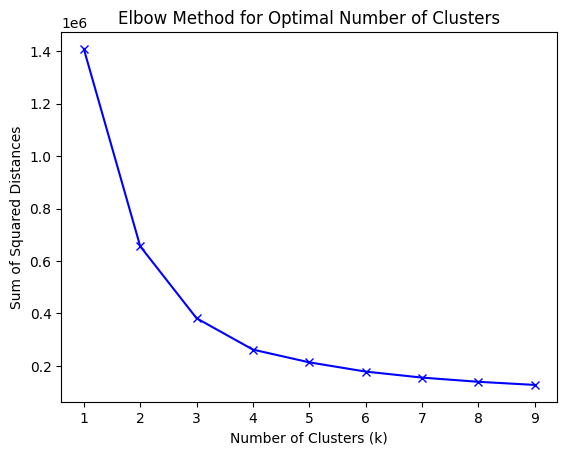

In [50]:
from sklearn import datasets


# List of possible values for the number of clusters (k)
k_values = range(1, 10)

# List to store the sum of squared distances for each cluster
variances = []

# Run K-means algorithm for different values of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    variances.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(k_values, variances, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

### looking at the distribution of customers based on their age and income

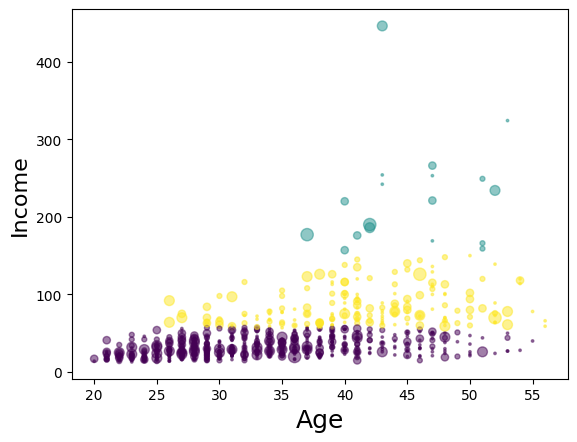

In [53]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

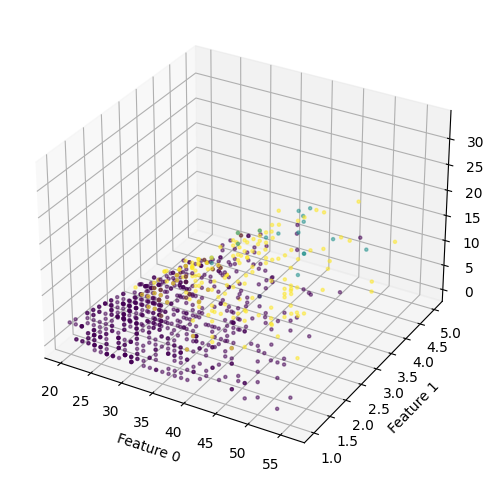

In [59]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels.astype(float), s=5, alpha=0.5) #s: size obj

# Set labels for each axis
ax.set_xlabel('Feature 0')
ax.set_ylabel('Feature 1')
ax.set_zlabel('Feature 2')

plt.show()
